<a href="https://colab.research.google.com/github/kaif033/Analysis/blob/main/incomedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_train=pd.read_csv(r"/content/train.csv")
df_test=pd.read_csv(r'/content/test.csv')

In [3]:
df_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [4]:
df=pd.concat([df_train,df_test],axis=0)

In [5]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1.0
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0.0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1.0
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0.0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,NaN
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,NaN
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,NaN
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,NaN


In [6]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K         899
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44856 entries, 0 to 898
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              44856 non-null  int64  
 1   workclass        42358 non-null  object 
 2   fnlwgt           44856 non-null  int64  
 3   education        44856 non-null  object 
 4   educational-num  44856 non-null  int64  
 5   marital-status   44856 non-null  object 
 6   occupation       42350 non-null  object 
 7   relationship     44856 non-null  object 
 8   race             44856 non-null  object 
 9   gender           44856 non-null  object 
 10  capital-gain     44856 non-null  int64  
 11  capital-loss     44856 non-null  int64  
 12  hours-per-week   44856 non-null  int64  
 13  native-country   44093 non-null  object 
 14  income_>50K      43957 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory usage: 5.5+ MB


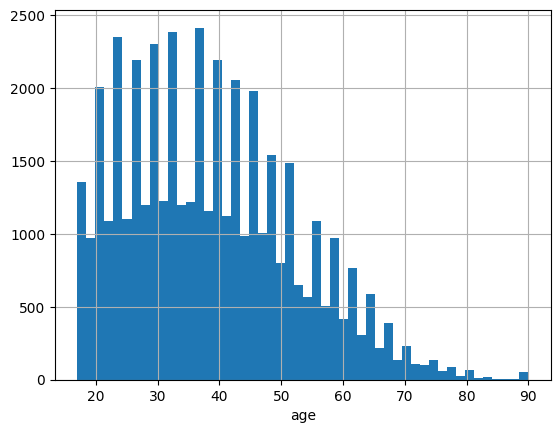

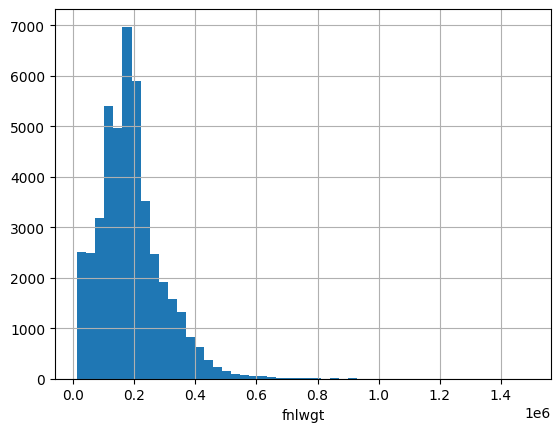

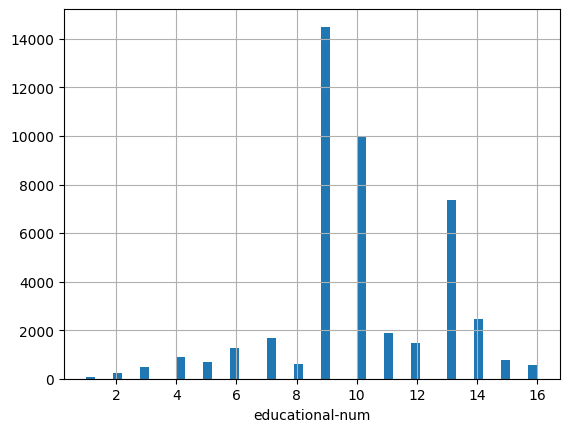

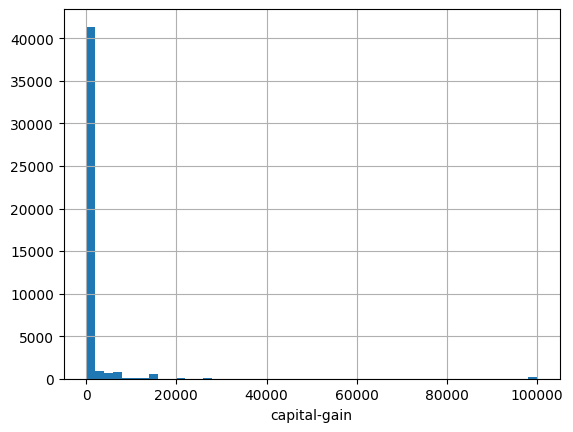

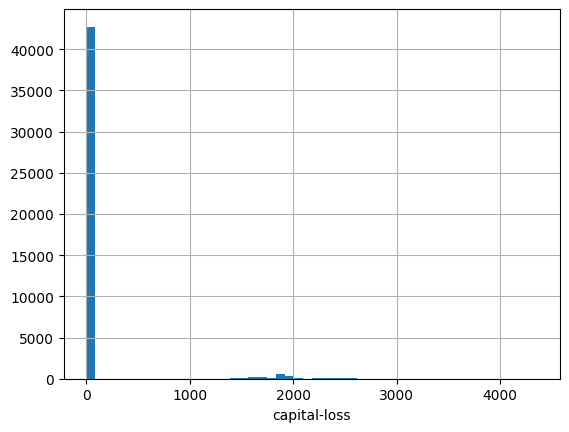

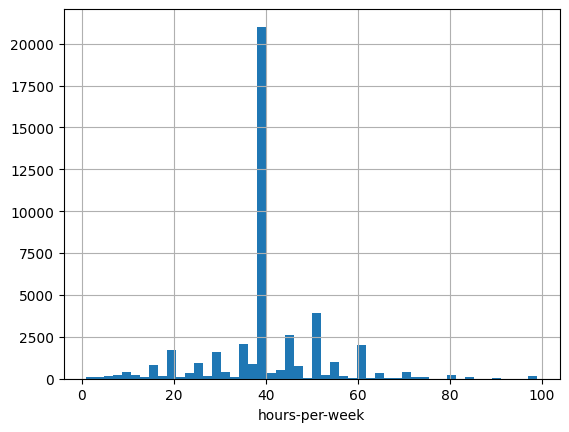

In [8]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes=="int64"]
for feat in numerical_features:
  df[feat].hist(bins=50)
  plt.xlabel(feat)
  plt.show()

In [9]:
features=[feature for feature in df.columns if df[feature].dtypes=="O"]

In [10]:
df.age.sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [11]:

def map_age_range(age):
    if 17 <= age <= 24:
        return 'Teenage'
    elif 25 <= age <= 50:
        return 'Adult'
    elif 51 <= age <= 65:
        return 'Middle-aged'
    else:
        return 'Senior'


df['Age Group'] = df['age'].apply(map_age_range)



In [12]:
df.drop(columns="age",inplace=True)

In [13]:
df.groupby("Age Group")["income_>50K"].size()

Age Group
Adult          28072
Middle-aged     7352
Senior          1658
Teenage         7774
Name: income_>50K, dtype: int64

<Axes: xlabel='income_>50K', ylabel='count'>

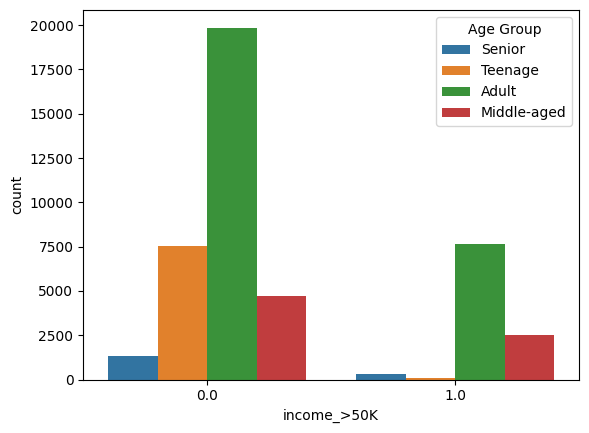

In [14]:
sns.countplot(df,x="income_>50K",hue="Age Group")

<Axes: xlabel='income_>50K', ylabel='count'>

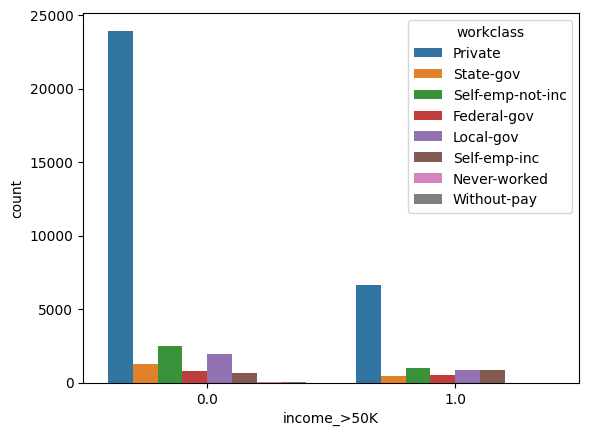

In [15]:
sns.countplot(df,x="income_>50K",hue="workclass")

In [16]:
df["education"].unique()
df["education"].value_counts()

HS-grad         14499
Some-college     9988
Bachelors        7361
Masters          2453
Assoc-voc        1864
11th             1681
Assoc-acdm       1480
10th             1276
7th-8th           875
Prof-school       763
9th               694
12th              599
Doctorate         546
5th-6th           473
1st-4th           226
Preschool          78
Name: education, dtype: int64

In [17]:
def education_mapping(qualification):
  if qualification in["12th",'7th-8th','9th', '10th', '11th','Preschool','5th-6th','1st-4th','HS-grad']:
    return "others"
  elif qualification in ['Assoc-voc','Assoc-acdm','Masters','Prof-school']:
    return "masters"
  else:
    return qualification



In [18]:
df["education"]=df["education"].apply(education_mapping)

In [19]:
df=df[~(df['marital-status']=="Married-spouse-absent") | (df['marital-status']=="Married-AF-spouse")]

In [20]:
df['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Widowed',
       'Separated', 'Married-AF-spouse'], dtype=object)

In [21]:
df=df[~(df["marital-status"]=='Married-AF-spouse')]

In [22]:
df["marital-status"].value_counts()

Married-civ-spouse    20549
Never-married         14811
Divorced               6099
Separated              1401
Widowed                1384
Name: marital-status, dtype: int64

In [23]:
df['marital-status'].replace('Separated', 'Divorced', inplace=True)

<ipython-input-23-2a8c2c740b49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital-status'].replace('Separated', 'Divorced', inplace=True)


<Axes: xlabel='income_>50K', ylabel='count'>

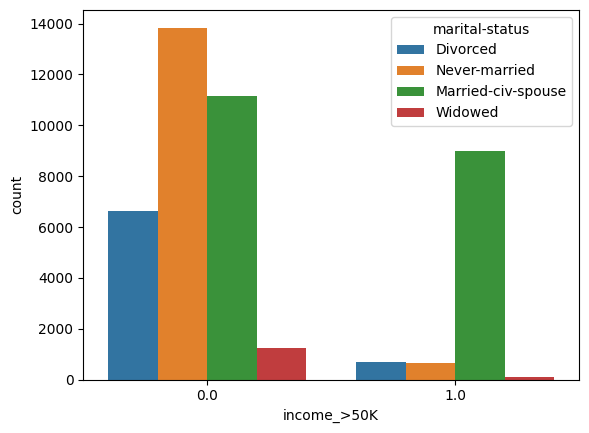

In [24]:
sns.countplot(df,x="income_>50K",hue="marital-status")

In [25]:
df["occupation"].value_counts()

Craft-repair         5572
Prof-specialty       5571
Exec-managerial      5561
Adm-clerical         5047
Sales                5016
Other-service        4449
Machine-op-inspct    2748
Transport-moving     2139
Handlers-cleaners    1874
Farming-fishing      1342
Tech-support         1335
Protective-serv       895
Priv-house-serv       220
Armed-Forces           14
Name: occupation, dtype: int64

In [26]:
df["relationship"].value_counts()

Husband           18092
Not-in-family     11274
Own-child          6910
Unmarried          4521
Wife               2113
Other-relative     1334
Name: relationship, dtype: int64

<Axes: xlabel='income_>50K', ylabel='count'>

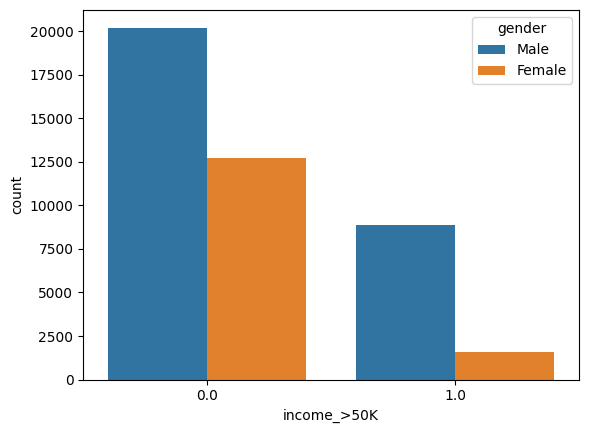

In [27]:
sns.countplot(df,x="income_>50K",hue="gender")

In [28]:
df.drop(columns="native-country",inplace=True)

In [29]:
df["gender"]=df["gender"].map({"Male":0,"female":1})

In [30]:
dumyy=[feature for feature in df.columns if df[feature].dtype=="O"]
dumyy

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'Age Group']

In [31]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income_>50K
fnlwgt,1.000000,-0.038479,NaN,-0.003473,-0.006300,-0.012061,-0.005815
educational-num,-0.038479,1.000000,NaN,0.125625,0.082646,0.145863,0.334614
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,-0.003473,0.125625,NaN,1.000000,-0.031700,0.082357,0.222492
capital-loss,-0.006300,0.082646,NaN,-0.031700,1.000000,0.055631,0.145887
hours-per-week,-0.012061,0.145863,NaN,0.082357,0.055631,1.000000,0.228185
income_>50K,-0.005815,0.334614,NaN,0.222492,0.145887,0.228185,1.000000


In [32]:
columns_to_dummy = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'Age Group']

# Create dummy variables for specified columns
dummy_df = pd.get_dummies(df[columns_to_dummy], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

# Drop the original categorical columns for which dummy variables were created
df.drop(columns=columns_to_dummy, inplace=True)

In [33]:
df

,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,Age Group_Middle-aged,Age Group_Senior,Age Group_Teenage
0,366425,16,0.0,99999,0,60,1.0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,244602,8,0.0,0,0,15,0.0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
2,174201,13,0.0,0,0,40,1.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,110199,4,0.0,0,0,40,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,149248,10,0.0,0,0,40,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,302406,14,0.0,0,0,55,NaN,0,0,1,...,0,0,0,0,0,0,1,0,0,0
895,218124,7,NaN,0,0,20,NaN,0,0,1,...,1,0,0,0,0,0,1,0,0,1
896,127139,10,NaN,0,0,40,NaN,0,0,1,...,1,0,0,0,0,0,1,0,0,1
897,132879,10,0.0,0,0,40,NaN,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [34]:
df["gender"]=df["gender"].fillna(df["gender"].mode()[0])

In [35]:
train_df_later=df[df["income_>50K"].isna()]

In [36]:
df=df[~df["income_>50K"].isna()]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'df' and the target column is named 'target'
# Replace 'features' with the columns you want to use as features
features = df.drop(columns="income_>50K")  # Replace 'feature1', 'feature2', 'feature3' with your feature columns
target = df['income_>50K']  # Replace 'target' with your target column

# Splitting the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [38]:
"""Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}
Best Score: 0.827355567382767"""

"Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}\nBest Score: 0.827355567382767"

In [39]:
"""Cross-validation Scores: [0.83724953 0.84546634 0.84575465 0.83811446 0.8416955 ]
Mean Accuracy: 0.8417 (±0.0036)"""

'Cross-validation Scores: [0.83724953 0.84546634 0.84575465 0.83811446 0.8416955 ]\nMean Accuracy: 0.8417 (±0.0036)'

In [40]:
best_rf__classifier=RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=20,
    max_features='auto',
    bootstrap=True,
    random_state=42
)


In [41]:
"""Accuracy: 0.8587
Precision: 0.7799
Recall: 0.5997
F1-score: 0.6781
Confusion Matrix:
[[6157  364]
 [ 861 1290]]"""

'Accuracy: 0.8587\nPrecision: 0.7799\nRecall: 0.5997\nF1-score: 0.6781\nConfusion Matrix:\n[[6157  364]\n [ 861 1290]]'

In [42]:
from imblearn.combine import SMOTETomek
# Applying SMOTE-Tomek resampling technique on the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)


In [43]:
y_train.value_counts()

0.0    26382
1.0     8302
Name: income_>50K, dtype: int64

In [44]:
best_rf__classifier.fit(X_train_resampled,y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto', n_estimators=200,
                       random_state=42)

In [45]:
predictions=best_rf__classifier.predict(X_test)

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

# Creating an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict on the test set with the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Score: 0.8695075543127562
Accuracy: 0.8661


In [47]:
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=100, random_state=42)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8661


NameError: name 'confusion_matrix' is not defined

In [49]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6153  368]
 [ 793 1358]]
